# Time-domain ODMR measurement

![frequency-shceduling](./figure/time-scheduling.jpg)


Import necessary modules and functions firstly

In [1]:
import matplotlib.pyplot as plt
from odmactor.scheduler import RamseyScheduler, RabiScheduler, RelaxationScheduler
from odmactor.utils.plotting import plot_ramsey, plot_rabi, plot_t1
import scipy.constants as C
import numpy as np


## Ramsey detection

**1. Set measurement parameters**
- number of readout operation $N$ per frequency measurement point
- delay time range for scanning modes, i.e., `[t_start, t_end, t_step]`, unit: "ns"
- calibrated MW $\pi$ pulse parameters, i.e., frequency (unit: Hz), power (unit: dBm) and time (unit: s)
- laser initialization time $t_{init}$, signal readout pulse time $t_{sig}$, etc.
- optional parameters: MW power $p$, if designed, the time of built-in MW $\pi$ pulse will be regulated correspondingly
- time bin $t$ per readout operation will be calculated dynamically when running the scheduler on scanning-time mode

In [12]:

t_start = 100
t_end = 4000
t_step = 20

pi_power = 10
pi_freq = 2.871 * C.giga
pi_time = 100 * C.nano

t_init = 1e3
inter_init_mw = 1e3
t_read_sig = 400
t_read_ref = t_read_sig

N = int(1e6 / 4)

**2. Construct a Ramsey Scheduler and run**

Especially, the calibrated MW $\pi$ pulse should be configured


In [13]:
scheduler = RamseyScheduler()
scheduler.pi_pulse['freq'], scheduler.pi_pulse['power'], scheduler.pi_pulse['time'] = pi_freq, pi_power, pi_time
scheduler.configure_odmr_seq(t_init, t_read_sig, t_read_ref, inter_init_mw, N=N)
scheduler.set_delay_times(t_start, t_end, t_step)
scheduler.configure_tagger_counting('cbm')

scheduler.run_scanning()
scheduler.close()


--- USE ASGDLL_x64.dll ---
Current Tagger input channels: {'apd': 'cbm', 'asg': 2}


TypeError: unsupported operand type(s) for /: 'NoneType' and 'float'

In [ ]:
# observe detection sequence
fig = scheduler.sequences_figure

**3. Calculate contrast and plot figures**

In [ ]:
## count & contrast
counts_sig_ref = scheduler.result  # [times, counts, counts_ref]
contrast = [sig/ref for sig, ref in zip(counts_sig_ref[1], counts_sig_ref[2])]

In [ ]:
plot_ramsey(counts_sig_ref[0], contrast)

## Rabi oscillation

**1. Set measurement parameters**
- number of readout operation $N$ per frequency measurement point
- delay time range for scanning modes, i.e., `[t_start, t_end, t_step]`, unit: "ns"
- laser initilization time $t_{init}$, singal readout pulse time $t_{sig}$, etc.
- MW power $p$, MW frequency $f$
- time bin $t$ per readout operation will be calculated dynamically when running the scheduler on scanning-time mode

In [12]:

t_start = 20
t_end = 2000
t_step = 20

t_init = 3e3
inter_init_mw = 3000
inter_mw_read = 100

t_read_sig  = 800


N = int(1e6/1.5)

p = 10
f = 2.852 * C.giga

**2. Construct a Rabi measurement Scheduler and run**

In [13]:
scheduler = RabiScheduler(mw_ttl=0)
scheduler.configure_mw_paras(power=p, freq=f)
scheduler.configure_odmr_seq(t_init,  t_read_sig, inter_init_mw=inter_init_mw,inter_mw_read =inter_mw_read , N=N)
scheduler.set_delay_times(t_start, t_end, t_step)
scheduler.configure_tagger_counting(reader='cbm')



# scheduler.asg_dwell


--- USE ASGDLL_x64.dll ---
Current Tagger input channels: {'apd': 1, 'asg': 2}


In [ ]:
scheduler.run_scanning()

scheduler.close()



Begin to run Rabi Scheduler. Time intervals: 20.000 - 2000.000 ns.
N: 666666, n_times: 100
Estimated total running time: 67.33 s
MW on/off status: True
scanning freq 20.000 ns
scanning freq 40.000 ns
scanning freq 60.000 ns
scanning freq 80.000 ns
scanning freq 100.000 ns
scanning freq 120.000 ns
scanning freq 140.000 ns
scanning freq 160.000 ns
scanning freq 180.000 ns
scanning freq 200.000 ns
scanning freq 220.000 ns
scanning freq 240.000 ns
scanning freq 260.000 ns
scanning freq 280.000 ns
scanning freq 300.000 ns
scanning freq 320.000 ns
scanning freq 340.000 ns
scanning freq 360.000 ns
scanning freq 380.000 ns
scanning freq 400.000 ns
scanning freq 420.000 ns
scanning freq 440.000 ns
scanning freq 460.000 ns
scanning freq 480.000 ns
scanning freq 500.000 ns
scanning freq 520.000 ns
scanning freq 540.000 ns
scanning freq 560.000 ns
scanning freq 580.000 ns
scanning freq 600.000 ns
scanning freq 620.000 ns
scanning freq 640.000 ns
scanning freq 660.000 ns
scanning freq 680.000 ns
sc

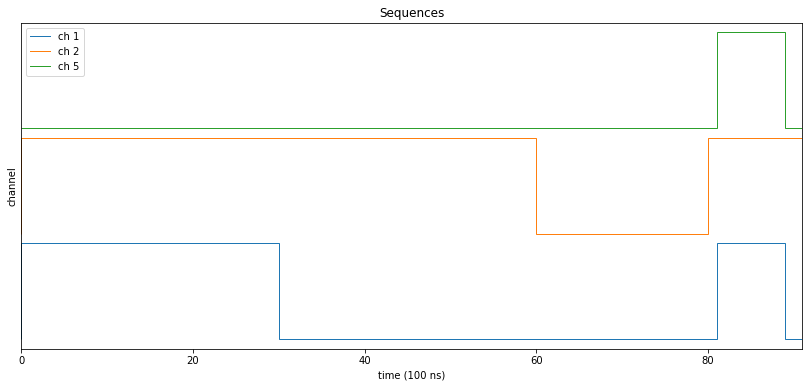

In [5]:
#fig = scheduler.sequences_figure


**3. Calculate contrast and plot figures**

In [10]:
## count & contrast
counts_sig_ref = scheduler.result  # [times, counts, counts_ref]
# contrast = [sig/ref for sig, ref in zip(counts_sig_ref[1], counts_sig_ref[2])]

Text(0, 0.5, 'counts')

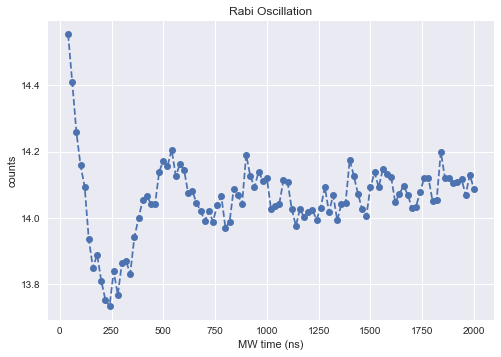

In [11]:
# plot_rabi(counts_sig_ref[0], counts_sig_ref[1])
plt.style.use('seaborn')

plt.plot(counts_sig_ref[0][1:], counts_sig_ref[1][1:], 'o--')
plt.title('Rabi Oscillation')
plt.xlabel('MW time (ns)')
plt.ylabel('counts')



## T1 relaxometry

**1. Set measurement parameters**
- number of readout operation $N$ per frequency measurement point
- delay time range for scanning modes, i.e., `[t_start, t_end, t_step]`, unit: "ns"
- laser initialization time $t_{init}$, signal readout pulse time $t_{sig}$, etc.
- calibrated MW $\pi$ pulse parameters, i.e., frequency (unit: Hz), power (unit: dBm) and time (unit: s)
- optional parameters: MW power $p$, if designed, the time of built-in MW $\pi$ pulse will be regulated correspondingly
- time bin $t$ per readout operation will be calculated dynamically when running the scheduler on scanning-time mode

In [ ]:

t_start = int(1e4)
t_end = int(1e6) 
t_step = int(2e3)

pi_power = 10
pi_freq = 2.871 * C.giga
pi_time = 100 * C.nano

t_init = 1e3
inter_init_mw = 1e3
t_read_sig = 400
t_read_ref = t_read_sig

N = int(1e6 / 4)

**Construct a T1 measurement scheduler and run**

In [5]:
scheduler = RelaxationScheduler()
scheduler.pi_pulse['freq'], scheduler.pi_pulse['power'], scheduler.pi_pulse['time'] = pi_freq, pi_power, pi_time
scheduler.configure_odmr_seq(t_init, t_read_sig, t_read_ref, inter_init_mw, N=N)
scheduler.set_delay_times(t_start, t_end, t_step)
scheduler.configure_tagger_counting('cbm')

scheduler.run_scanning()
scheduler.close()


--- USE ASGDLL_x64.dll ---


NameError: name 'pi_freq' is not defined

In [ ]:
# observe sequence figure
fig = scheduler.sequences_figure

**3. Calculate contrast and plot figures**

In [ ]:
## count & contrast
counts_sig_ref = scheduler.result  # [times, counts, counts_ref]
contrast = [sig/ref for sig, ref in zip(counts_sig_ref[1], counts_sig_ref[2])]

In [ ]:
plot_t1(counts_sig_ref[0], contrast)